In [6]:
import os
os.environ["USE_PYGEOS"] = "0"
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file

## Get data

In [3]:
# NYC Boros
zippath = datasets.get_path('nybb')
polydf = read_file(zippath)

In [4]:
# Generate some points
b = [int(x) for x in polydf.total_bounds]
N = 8
pointdf = GeoDataFrame([
    {'geometry': Point(x, y), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

In [5]:
# Make sure they're using the same projection reference
pointdf.crs = polydf.crs

In [7]:
pointdf

,geometry,value1,value2
0,POINT (913175.000 120121.000),1033296,793054
1,POINT (932450.000 139211.000),1071661,793239
2,POINT (951725.000 158301.000),1110026,793424
3,POINT (971000.000 177391.000),1148391,793609
4,POINT (990275.000 196481.000),1186756,793794
5,POINT (1009550.000 215571.000),1225121,793979
6,POINT (1028825.000 234661.000),1263486,794164
7,POINT (1048100.000 253751.000),1301851,794349
8,POINT (1067375.000 272841.000),1340216,794534


<AxesSubplot: >

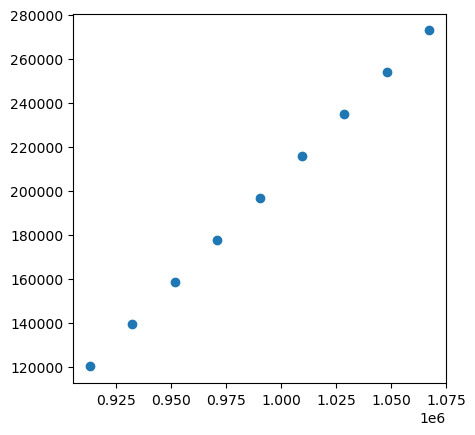

In [9]:
pointdf.plot()

In [8]:
polydf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot: >

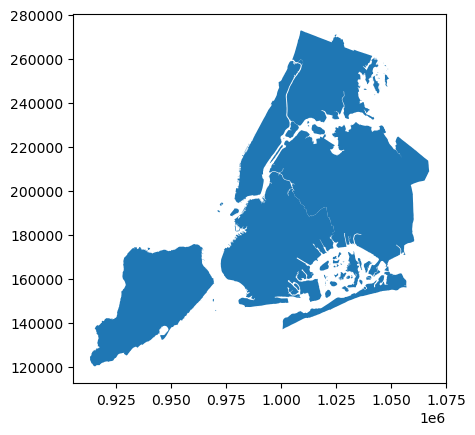

In [10]:
polydf.plot()

<AxesSubplot: >

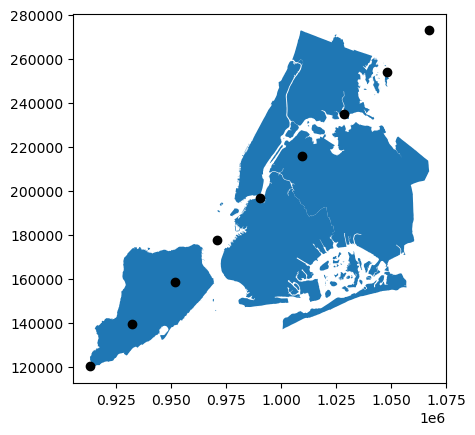

In [16]:
# see how geometries overlays
ax = polydf["geometry"].plot()
pointdf["geometry"].plot(ax=ax, color="black")

# polydf.plot()
# pointdf.plot()

## Spatial joins

### Left

In [17]:
join_left_df = pointdf.sjoin(polydf, how="left")
join_left_df
# Note the NaNs where the point did not intersect a boro
# add poly to points which overlays with them

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,POINT (913175.000 120121.000),1033296,793054,NaN,NaN,NaN,NaN,NaN
1,POINT (932450.000 139211.000),1071661,793239,0.0,5.0,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0.0,5.0,Staten Island,330470.010332,1.623820e+09
3,POINT (971000.000 177391.000),1148391,793609,NaN,NaN,NaN,NaN,NaN
4,POINT (990275.000 196481.000),1186756,793794,NaN,NaN,NaN,NaN,NaN
5,POINT (1009550.000 215571.000),1225121,793979,1.0,4.0,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4.0,2.0,Bronx,464392.991824,1.186925e+09
7,POINT (1048100.000 253751.000),1301851,794349,NaN,NaN,NaN,NaN,NaN
8,POINT (1067375.000 272841.000),1340216,794534,NaN,NaN,NaN,NaN,NaN


### Right

In [18]:
join_right_df = pointdf.sjoin(polydf, how="right")
join_right_df
# Note Staten Island is repeated
# add points to poly which overlays with them

,index_left,value1,value2,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1.0,1071661.0,793239.0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
0,2.0,1110026.0,793424.0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,5.0,1225121.0,793979.0,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,NaN,NaN,NaN,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,NaN,NaN,NaN,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,6.0,1263486.0,794164.0,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot: >

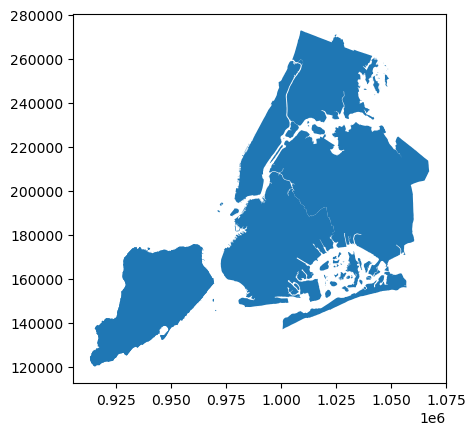

In [14]:
join_right_df.plot()

### Intersection

In [19]:
join_inner_df = pointdf.sjoin(polydf, how="inner")
join_inner_df
# Note the lack of NaNs; dropped anything that didn't intersect

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
1,POINT (932450.000 139211.000),1071661,793239,0,5,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0,5,Staten Island,330470.010332,1.623820e+09
5,POINT (1009550.000 215571.000),1225121,793979,1,4,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4,2,Bronx,464392.991824,1.186925e+09


### Additional params

We’re not limited to using the intersection binary predicate. Any of the Shapely geometry methods that return a Boolean can be used by specifying the predicate kwarg.

In [20]:
pointdf.sjoin(polydf, how="left", predicate="within")

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,POINT (913175.000 120121.000),1033296,793054,NaN,NaN,NaN,NaN,NaN
1,POINT (932450.000 139211.000),1071661,793239,0.0,5.0,Staten Island,330470.010332,1.623820e+09
2,POINT (951725.000 158301.000),1110026,793424,0.0,5.0,Staten Island,330470.010332,1.623820e+09
3,POINT (971000.000 177391.000),1148391,793609,NaN,NaN,NaN,NaN,NaN
4,POINT (990275.000 196481.000),1186756,793794,NaN,NaN,NaN,NaN,NaN
5,POINT (1009550.000 215571.000),1225121,793979,1.0,4.0,Queens,896344.047763,3.045213e+09
6,POINT (1028825.000 234661.000),1263486,794164,4.0,2.0,Bronx,464392.991824,1.186925e+09
7,POINT (1048100.000 253751.000),1301851,794349,NaN,NaN,NaN,NaN,NaN
8,POINT (1067375.000 272841.000),1340216,794534,NaN,NaN,NaN,NaN,NaN


In [22]:
pointdf.sjoin_nearest(polydf, how="left", distance_col="Distances")
# Note the optional Distances column with computed distances between each point
# and the nearest polydf geometry.

,geometry,value1,value2,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area,Distances
0,POINT (913175.000 120121.000),1033296,793054,0,5,Staten Island,330470.010332,1.623820e+09,1479.291092
1,POINT (932450.000 139211.000),1071661,793239,0,5,Staten Island,330470.010332,1.623820e+09,0.000000
2,POINT (951725.000 158301.000),1110026,793424,0,5,Staten Island,330470.010332,1.623820e+09,0.000000
3,POINT (971000.000 177391.000),1148391,793609,2,3,Brooklyn,741080.523166,1.937479e+09,5075.979291
4,POINT (990275.000 196481.000),1186756,793794,2,3,Brooklyn,741080.523166,1.937479e+09,22.361467
5,POINT (1009550.000 215571.000),1225121,793979,1,4,Queens,896344.047763,3.045213e+09,0.000000
6,POINT (1028825.000 234661.000),1263486,794164,4,2,Bronx,464392.991824,1.186925e+09,0.000000
7,POINT (1048100.000 253751.000),1301851,794349,4,2,Bronx,464392.991824,1.186925e+09,818.940377
8,POINT (1067375.000 272841.000),1340216,794534,4,2,Bronx,464392.991824,1.186925e+09,25368.109000
